# Stacking Models

#### This notebook seeks to combine our best performing algorithms from the kaggle turnament and use them to create a stacked algorthm

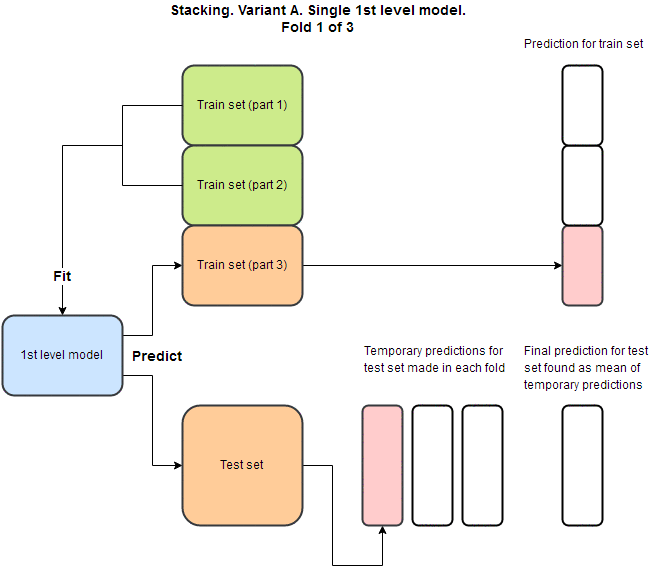

### Cleaning Data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [11]:
diamonds = pd.read_csv('./diamonds-datamad0321/train.csv')

In [12]:
onehotencoder = OneHotEncoder()

diamonds_color = onehotencoder.fit_transform(diamonds['color'].values.reshape(-1,1)).toarray()

labels = [str(a) for a in list(diamonds.color.unique())]

diamonds[labels] = pd.DataFrame(diamonds_color,index = diamonds.index)

In [13]:
diamonds_cut = onehotencoder.fit_transform(diamonds['cut'].values.reshape(-1,1)).toarray()

labels = [str(a) for a in list(diamonds.cut.unique())]

diamonds[labels] = pd.DataFrame(diamonds_cut,index = diamonds.index)

diamonds

,id,carat,cut,color,clarity,depth,table,x,y,z,...,J,F,E,I,D,Premium,Good,Very Good,Ideal,Fair
0,0,1.01,Premium,G,VS1,62.7,58.0,6.36,6.31,3.97,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.60,Good,G,VS2,64.3,57.0,5.31,5.38,3.43,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,1.60,Premium,H,SI2,59.4,59.0,7.55,7.60,4.50,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,0.30,Very Good,J,VS1,63.5,58.0,4.27,4.24,2.70,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,4,1.00,Very Good,F,SI2,62.8,57.0,6.37,6.44,4.02,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.51,Ideal,E,VS2,62.5,55.0,5.08,5.13,3.19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
40451,40451,0.80,Ideal,H,VS2,62.1,54.0,5.96,5.99,3.71,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
40452,40452,1.53,Premium,G,SI2,58.7,59.0,7.51,7.45,4.39,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40453,40453,1.51,Ideal,I,VS2,61.6,54.0,7.38,7.42,4.57,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [14]:
onehotencoder = OneHotEncoder()
diamonds_clarity = onehotencoder.fit_transform(diamonds['clarity'].values.reshape(-1,1)).toarray()
labels = [str(a) for a in list(diamonds.clarity.unique())]
diamonds[labels] = pd.DataFrame(diamonds_clarity,index = diamonds.index)
diamonds = diamonds.drop(['clarity', 'color', 'cut'], axis = 1)

In [15]:
diamonds

,id,carat,depth,table,x,y,z,price,G,H,...,Ideal,Fair,VS1,VS2,SI2,IF,SI1,VVS2,VVS1,I1
0,0,1.01,62.7,58.0,6.36,6.31,3.97,8.754,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,0.60,64.3,57.0,5.31,5.38,3.43,7.492,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,1.60,59.4,59.0,7.55,7.60,4.50,9.010,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,0.30,63.5,58.0,4.27,4.24,2.70,6.227,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,1.00,62.8,57.0,6.37,6.44,4.02,8.314,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.51,62.5,55.0,5.08,5.13,3.19,7.412,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
40451,40451,0.80,62.1,54.0,5.96,5.99,3.71,8.016,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
40452,40452,1.53,58.7,59.0,7.51,7.45,4.39,9.070,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
40453,40453,1.51,61.6,54.0,7.38,7.42,4.57,9.199,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
diamonds['depth'] = scaler.fit_transform(diamonds["depth"].values.reshape(-1,1))

In [17]:
scaler = StandardScaler()

diamonds['table'] = scaler.fit_transform(diamonds["table"].values.reshape(-1,1))

diamonds

0        0.244212
1       -0.204490
2        0.692914
3        0.244212
4       -0.204490
           ...   
40450   -1.101894
40451   -1.550596
40452    0.692914
40453   -1.550596
40454   -0.204490
Name: table, Length: 40455, dtype: float64

In [128]:
diamonds.shape

(40455, 28)

In [129]:
diamonds.drop()


Index(['id', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'G', 'H', 'J',
       'F', 'E', 'I', 'D', 'Premium', 'Good', 'Very Good', 'Ideal', 'Fair',
       'VS1', 'VS2', 'SI2', 'IF', 'SI1', 'VVS2', 'VVS1', 'I1'],
      dtype='object')

## Creating Training Data

In [65]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

In [19]:
X = diamonds.drop('price', axis =1)

In [20]:
y = diamonds.price

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.19)

# Creating a Stacked Model

In [25]:
!pip install vecstack

  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19878 sha256=379293a0e018cff3a81cdfd2070f47c29bd1d8f12b102f6b2f5cf7bcd29188cd
  Stored in directory: /Users/javiercabrera/Library/Caches/pip/wheels/17/89/0b/21d5484cbf713c95b641ec1bdc40dd7ae798cbdea2337e3535
Successfully built vecstack
You should consider upgrading via the '/Users/javiercabrera/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [69]:
from sklearn.base import TransformerMixin
from sklearn.datasets import make_regression
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from vecstack import stacking
import pickle
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from vecstack import StackingTransformer

In [28]:
XGB3 = pickle.load(open("xgb_3", 'rb'))

In [53]:
XGB3

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.100000001, max_delta_step=0, max_depth=14,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
GB_model = pickle.load(open("GB_model", 'rb'))

In [31]:
RF = pickle.load(open('rf3', 'rb'))
RF

RandomForestRegressor(max_depth=20, max_features=22, min_samples_split=4,
                      n_estimators=110)

In [47]:
RF2 = pickle.load(open('random_forest2', 'rb'))

In [35]:
XGB6 = pickle.load(open('xgb_6', 'rb'))

In [36]:
XGB6

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.095, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.0949999988, max_delta_step=0, max_depth=13,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=110, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [160]:
XGB7 = pickle.load(open("xgb_7", 'rb'))

# Level 1

In [182]:
#Creating a list of models to pass to the first level of the algorithm

models_l1 = [
        
    ('xgb3', XGB3),
    
    ('xgb6', XGB6),
    
    ('xgb7', XGB7),
    
    ]

In [183]:

#We initialize a stacking Transformer
Stack= StackingTransformer(estimators= models_l1, 
                            regression=True,                               
                            variant='A',                # oof for train set, predict tes                            #     set in each fold and find mean
                            metric=mean_squared_error,   # metric: callable
                            n_folds=4,                  # number of folds
                            shuffle=True,               # shuffle the data
                            random_state=0,             
                            verbose=2)

In [184]:
#We fit our stacked transformer with our train data
stack = Stack.fit(X_train, y_train)

task:         [regression]
metric:       [mean_squared_error]
variant:      [A]
n_estimators: [3]

estimator  0: [xgb3: XGBRegressor]
    fold  0:  [0.00807344]
    fold  1:  [0.00784536]
    fold  2:  [0.00760735]
    fold  3:  [0.00812096]
    ----
    MEAN:     [0.00791178] + [0.00020432]

estimator  1: [xgb6: XGBRegressor]
    fold  0:  [0.00802655]
    fold  1:  [0.00782512]
    fold  2:  [0.00754137]
    fold  3:  [0.00819009]
    ----
    MEAN:     [0.00789579] + [0.00024203]

estimator  2: [xgb7: XGBRegressor]
    fold  0:  [0.00802731]
    fold  1:  [0.00782050]
    fold  2:  [0.00754092]
    fold  3:  [0.00819004]
    ----
    MEAN:     [0.00789469] + [0.00024263]



In [185]:
#We prepare our second X train data from the 1st stacking level
S_train = stack.transform(X_train)

Train set was detected.
Transforming...

estimator  0: [xgb3: XGBRegressor]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

estimator  1: [xgb6: XGBRegressor]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

estimator  2: [xgb7: XGBRegressor]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE



In [186]:
#We prepare our second X test data from the 1st stacking level

S_test = stack.transform(X_test)


Transforming...

estimator  0: [xgb3: XGBRegressor]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

estimator  1: [xgb6: XGBRegressor]
    model from fold  0: done


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

estimator  2: [xgb7: XGBRegressor]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE



In [187]:
S_train[:5]


array([[6.72111893, 6.69602156, 6.69603443],
       [6.61189842, 6.65488434, 6.65489721],
       [8.16131687, 8.15575886, 8.15577126],
       [7.80728483, 7.80789375, 7.80790663],
       [9.60688591, 9.68837261, 9.68836975]])

In [188]:
S_test[:5]


array([[6.84532845, 6.85296285, 6.85274899],
       [6.85965562, 6.8464545 , 6.84646881],
       [6.89501059, 6.8886044 , 6.88893199],
       [8.29907727, 8.29987431, 8.30089927],
       [8.73826623, 8.74083447, 8.74131584]])

# Passing Model through last level

In [189]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [194]:
final_estimator = LinearRegression()

# Fit
final_estimator = final_estimator.fit(S_train, y_train)

# Predict
y_pred = final_estimator.predict(S_test)

# Final prediction score
print('Final prediction score: [%.8f]' % mean_squared_error(y_test, y_pred))

Final prediction score: [0.00727501]


In [ ]:
[0.00722849]

In [100]:
stack.n_estimators_


5

### Creating Implementable pipeline with our stacked model

In [195]:
#Specify steps of Pipeline
steps = [('stack', stack),
         ('final_estimator', final_estimator)]

# Init Pipeline
pipe = Pipeline(steps)

In [196]:
# Fit
pipe = pipe.fit(X_train, y_train)
#Save Model
pickle.dump(pipe, open("Stacked_Regressor_Model_2", 'wb'))

task:         [regression]
metric:       [mean_squared_error]
variant:      [A]
n_estimators: [3]

estimator  0: [xgb3: XGBRegressor]
    fold  0:  [0.00807344]
    fold  1:  [0.00784536]
    fold  2:  [0.00760735]
    fold  3:  [0.00812096]
    ----
    MEAN:     [0.00791178] + [0.00020432]

estimator  1: [xgb6: XGBRegressor]
    fold  0:  [0.00802655]
    fold  1:  [0.00782512]
    fold  2:  [0.00754137]
    fold  3:  [0.00819009]
    ----
    MEAN:     [0.00789579] + [0.00024203]

estimator  2: [xgb7: XGBRegressor]
    fold  0:  [0.00802731]
    fold  1:  [0.00782050]
    fold  2:  [0.00754092]
    fold  3:  [0.00819004]
    ----
    MEAN:     [0.00789469] + [0.00024263]

Train set was detected.
Transforming...

estimator  0: [xgb3: XGBRegressor]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

estimator  1: [xgb6: XGBRegressor]
    model from fold  0: done
    model from fold  1: done
    model fr

In [199]:
diamond_test

,Unnamed: 0,carat,depth,table,x,y,z,H,D,F,...,Very Good,Fair,SI1,VS1,VS2,SI2,VVS1,IF,VVS2,I1
0,0,2.01,0.099968,-0.204957,8.14,8.05,5.01,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,0.49,-3.000824,1.127292,5.18,5.25,3.00,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,1.03,-2.225626,2.015458,6.65,6.60,3.88,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,0.90,0.875166,-0.649040,6.11,6.15,3.86,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,0.59,0.522803,-1.093122,5.35,5.40,3.36,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.41,1.438946,-0.204957,4.72,4.69,3.00,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13481,13481,2.05,1.227529,2.015458,8.05,7.91,5.07,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13482,13482,2.22,-0.886648,0.683209,8.41,8.37,5.08,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13483,13483,0.51,-2.437043,2.015458,5.20,5.19,3.04,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Testing The Stacked Model

In [198]:
diamond_test = pd.read_csv('diamond_stk.csv')

In [200]:
#We create a price column with testing data

diamond_test['price'] = pipe.predict(diamond_test)


Transforming...

estimator  0: [xgb3: XGBRegressor]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


    model from fold  3: done
    ----
    DONE

estimator  1: [xgb6: XGBRegressor]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

estimator  2: [xgb7: XGBRegressor]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE



In [201]:
diamond_test[['Unnamed: 0', 'price']]

,Unnamed: 0,price
0,0,9.612877
1,1,7.316756
2,2,8.444900
3,3,8.306938
4,4,7.476398
...,...,...
13480,13480,6.438645
13481,13481,9.646162
13482,13482,9.723094
13483,13483,7.068309


In [202]:
diamond_test['id'] = diamond_test['Unnamed: 0']

In [203]:
diamond_test_pred = diamond_test[['id', 'price']]

In [204]:
diamond_test_pred

,id,price
0,0,9.612877
1,1,7.316756
2,2,8.444900
3,3,8.306938
4,4,7.476398
...,...,...
13480,13480,6.438645
13481,13481,9.646162
13482,13482,9.723094
13483,13483,7.068309


In [205]:
diamond_test_pred.to_csv('stacked_price_pred2.csv', index = False)